In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

%config InlineBackend.figure_format = 'retina'

To install basemap

`conda install -c conda-forge proj4`

`conda install -c anaconda basemap`

In this notebook we will preprocess data to be able to compute death rates by state due to covid. You will need this data for plotting a map in hw3. 

## Dataframes 

A DataFrame object is a two-dimensional matrix with rows and columns. Each column can have different data types, but all values within a column must be of the same data type. The columns behave like [series objects](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

Data frames columns are ordered and the name-to-column mapping is stored in an index. Data frames also have an index for the rows, just like a series has an index into the values of the series. So, a data frame has two indexes which lets us zero in, for example, on a specific element using row and column index values.

Let's use `pd.read_csv` to read a csv file with all covid cases per state. Taken from the [nytimes github]( https://github.com/nytimes/covid-19-data). `.head()` gives the top 5 rows of the dataframe.

In [2]:
covid = pd.read_csv("data/us-states.csv")
covid.head()

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-09-13,Alabama,1,137646,2350,124823.0,2217.0,12823.0,133.0
1,2020-09-13,Alaska,2,7074,41,7074.0,41.0,0.0,0.0
2,2020-09-13,Arizona,4,208128,5316,NaN,NaN,NaN,NaN
3,2020-09-13,Arkansas,5,69710,969,68542.0,964.0,1168.0,5.0
4,2020-09-13,California,6,760581,14333,759405.0,14333.0,1176.0,0.0


This dataframe has population estimates and a lot of other info. See `data/nst-est2019-alldata.pdf` for a descrition of all columns.

In [3]:
population = pd.read_csv("data/nst-est2019-alldata.csv")
population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [4]:
## let's look at the columns. I am looking for the population of 2019 per state.
#list(population.columns)

Always look at shapes of objects before and after you manipulate them. You will get `(number of row, number of columns).` How many states in United States of America?

In [5]:
covid.shape, population.shape

((55, 9), (57, 151))

In [6]:
covid.describe()
# note that the counts are different because there are missing values in some columns

,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
count,55.000000,55.000000,55.000000,45.000000,43.000000,45.000000,43.000000
mean,32.036364,118266.836364,3519.109091,105709.800000,3490.976744,19262.711111,326.395349
std,18.878720,164916.295797,5625.762420,159461.140412,5493.333139,98601.075311,942.468621
min,1.000000,60.000000,2.000000,0.000000,2.000000,0.000000,0.000000
25%,17.500000,17581.500000,434.500000,12225.000000,330.500000,0.000000,0.000000
50%,31.000000,69710.000000,1218.000000,68542.000000,1210.000000,662.000000,3.000000
75%,45.500000,134754.000000,4123.500000,122637.000000,3453.000000,2844.000000,167.500000
max,78.000000,760581.000000,32625.000000,759405.000000,28002.000000,661563.000000,4623.000000


In [7]:
# covid["confirmed_cases"]
covid["confirmed_cases"].isnull()

0     False
1     False
2      True
3     False
4     False
5      True
6      True
7      True
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37     True
38    False
39    False
40     True
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49     True
50    False
51    False
52    False
53    False
54    False
Name: confirmed_cases, dtype: bool

In [8]:
# count how many rows are null?
(covid["confirmed_cases"].isnull() == True).sum()

10

In [9]:
# similarly 
(covid["confirmed_cases"].isnull()).sum()

10

In [10]:
# is.na() also works
(covid["confirmed_cases"].isna()).sum()

10

In [11]:
# take first 10 elements of the column "confirmed_cases"
c = covid["confirmed_cases"][:10]
c

0    124823.0
1      7074.0
2         NaN
3     68542.0
4    759405.0
5         NaN
6         NaN
7         NaN
8     14552.0
9         0.0
Name: confirmed_cases, dtype: float64

In [12]:
# be careful on how different functions behave with respect to NAs
len(c), c.count(), c.sum(), c.sum(skipna=False), np.sum(c), sum(c)

(10, 6, 974396.0, nan, 974396.0, nan)

In [13]:
# if you want to fill the NAs you can do
covid = covid.fillna(-1)
covid.head()

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-09-13,Alabama,1,137646,2350,124823.0,2217.0,12823.0,133.0
1,2020-09-13,Alaska,2,7074,41,7074.0,41.0,0.0,0.0
2,2020-09-13,Arizona,4,208128,5316,-1.0,-1.0,-1.0,-1.0
3,2020-09-13,Arkansas,5,69710,969,68542.0,964.0,1168.0,5.0
4,2020-09-13,California,6,760581,14333,759405.0,14333.0,1176.0,0.0


### Exercise 1 
How to fill NAs with different values for different columns? 

## Subsetting and merging dataframes
We need info about deaths from the covid dataframe and info about population from other dataframe. Let's keep just that. Also we need a way to combine (merge) the two dataframes. The column `fips` is a unique identifier for the state so I will keep that. Also the state name can be useful.

In [14]:
covid.head()

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-09-13,Alabama,1,137646,2350,124823.0,2217.0,12823.0,133.0
1,2020-09-13,Alaska,2,7074,41,7074.0,41.0,0.0,0.0
2,2020-09-13,Arizona,4,208128,5316,-1.0,-1.0,-1.0,-1.0
3,2020-09-13,Arkansas,5,69710,969,68542.0,964.0,1168.0,5.0
4,2020-09-13,California,6,760581,14333,759405.0,14333.0,1176.0,0.0


In [15]:
# selecting columns
covid = covid[["state", "fips", "deaths"]]
covid.head()

,state,fips,deaths
0,Alabama,1,2350
1,Alaska,2,41
2,Arizona,4,5316
3,Arkansas,5,969
4,California,6,14333


In [16]:
population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [17]:
# from the pdf we have the following info
# STATE = State FIPS code
# NAME = State name
# POPESTIMATE2019 = 7/1/2019 resident total population estimate

population = population[["STATE", "NAME", "POPESTIMATE2019"]]
# show first 10 rows
population.iloc[:10]

,STATE,NAME,POPESTIMATE2019
0,0,United States,328239523
1,0,Northeast Region,55982803
2,0,Midwest Region,68329004
3,0,South Region,125580448
4,0,West Region,78347268
5,1,Alabama,4903185
6,2,Alaska,731545
7,4,Arizona,7278717
8,5,Arkansas,3017804
9,6,California,39512223


In [18]:
# we are not interested in top values of the population table (aggregates)
population = population.iloc[5:] # all rows after 5
population.head()

,STATE,NAME,POPESTIMATE2019
5,1,Alabama,4903185
6,2,Alaska,731545
7,4,Arizona,7278717
8,5,Arkansas,3017804
9,6,California,39512223


In [19]:
covid.shape, population.shape

((55, 3), (52, 3))

There are various ways to merge two dataframes. At the moment we want to preserve all the data.
`outer`: use union of keys from both frames

In [20]:
# Can we merge on state name?
rates = covid.merge(population, how="outer", left_on='fips', right_on='STATE')

In [21]:
rates.iloc[:15]

,state,fips,deaths,STATE,NAME,POPESTIMATE2019
0,Alabama,1,2350,1.0,Alabama,4903185.0
1,Alaska,2,41,2.0,Alaska,731545.0
2,Arizona,4,5316,4.0,Arizona,7278717.0
3,Arkansas,5,969,5.0,Arkansas,3017804.0
4,California,6,14333,6.0,California,39512223.0
5,Colorado,8,1994,8.0,Colorado,5758736.0
6,Connecticut,9,4480,9.0,Connecticut,3565287.0
7,Delaware,10,613,10.0,Delaware,973764.0
8,District of Columbia,11,616,11.0,District of Columbia,705749.0
9,Florida,12,12599,12.0,Florida,21477737.0


In [22]:
# let's look at rows with NAs
na_index = rates["POPESTIMATE2019"].isnull()
rates[na_index]

,state,fips,deaths,STATE,NAME,POPESTIMATE2019
11,Guam,66,24,NaN,NaN,NaN
36,Northern Mariana Islands,69,2,NaN,NaN,NaN
50,Virgin Islands,78,19,NaN,NaN,NaN


In [23]:
## Let's drop them
rates = rates.dropna()
rates.shape

(52, 6)

In [24]:
# cleaning up some more
rates = rates[["state", "fips", "deaths", "POPESTIMATE2019"]]

In [25]:
rates["rates"] = 1000*rates["deaths"]/rates["POPESTIMATE2019"]  # set a new column
rates

,state,fips,deaths,POPESTIMATE2019,rates
0,Alabama,1,2350,4903185.0,0.479280
1,Alaska,2,41,731545.0,0.056046
2,Arizona,4,5316,7278717.0,0.730348
3,Arkansas,5,969,3017804.0,0.321094
4,California,6,14333,39512223.0,0.362749
5,Colorado,8,1994,5758736.0,0.346257
6,Connecticut,9,4480,3565287.0,1.256561
7,Delaware,10,613,973764.0,0.629516
8,District of Columbia,11,616,705749.0,0.872832
9,Florida,12,12599,21477737.0,0.586607


In [26]:
# sorting by rates
rates = rates.sort_values(by=["rates"])
#rates

In [27]:
## mean value of the rate column
rates["rates"].mean(), rates["rates"].median()

(0.4777614375170417, 0.34672115672653503)

In [28]:
rates["rates"].quantile(q=[0.1, 0.25, 0.5, 0.75, 0.9])

0.10    0.120297
0.25    0.219607
0.50    0.346721
0.75    0.621076
0.90    1.000105
Name: rates, dtype: float64

In [29]:
# if you want 7 groups of color you need 8 quantiles 
q = np.linspace(0, 1, 8, endpoint=True) # equidistant numbers between 0 and 1
q

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [30]:
# compute quantile of covid rates
rates["rates"].quantile(q=q)

0.000000    0.056046
0.142857    0.138943
0.285714    0.230004
0.428571    0.316019
0.571429    0.386831
0.714286    0.588249
0.857143    0.832122
1.000000    1.804397
Name: rates, dtype: float64

In [31]:
qq =  rates["rates"].quantile(q=q)
type(qq) # what is the type?

pandas.core.series.Series

In [32]:
type(qq.values) # I prefer working with numpy arrays

numpy.ndarray

In [33]:
boundaries = rates["rates"].quantile(q=q).values
boundaries

array([0.05604577, 0.13894278, 0.23000448, 0.31601922, 0.38683079,
       0.5882494 , 0.83212211, 1.80439734])

In [34]:
## let's define a new ordinal variable based on the quantiles of the rates
rates["color"] = pd.qcut(rates["rates"], 7)
rates["color"]

1     (0.055, 0.139]
12    (0.055, 0.139]
54    (0.055, 0.139]
48    (0.055, 0.139]
20    (0.055, 0.139]
39    (0.055, 0.139]
27    (0.055, 0.139]
47    (0.055, 0.139]
52     (0.139, 0.23]
41     (0.139, 0.23]
17     (0.139, 0.23]
44     (0.139, 0.23]
53     (0.139, 0.23]
35     (0.139, 0.23]
38     (0.139, 0.23]
28     (0.23, 0.316]
13     (0.23, 0.316]
18     (0.23, 0.316]
51     (0.23, 0.316]
26     (0.23, 0.316]
34     (0.23, 0.316]
45     (0.23, 0.316]
49    (0.316, 0.387]
30    (0.316, 0.387]
3     (0.316, 0.387]
5     (0.316, 0.387]
24    (0.316, 0.387]
4     (0.316, 0.387]
37    (0.316, 0.387]
16    (0.316, 0.387]
32    (0.387, 0.588]
29    (0.387, 0.588]
0     (0.387, 0.588]
46    (0.387, 0.588]
15    (0.387, 0.588]
10    (0.387, 0.588]
9     (0.387, 0.588]
43    (0.588, 0.832]
40    (0.588, 0.832]
7     (0.588, 0.832]
21    (0.588, 0.832]
14    (0.588, 0.832]
23    (0.588, 0.832]
2     (0.588, 0.832]
8     (0.832, 1.804]
25    (0.832, 1.804]
42    (0.832, 1.804]
19    (0.832,

In [35]:
rates["color"].unique()

[(0.055, 0.139], (0.139, 0.23], (0.23, 0.316], (0.316, 0.387], (0.387, 0.588], (0.588, 0.832], (0.832, 1.804]]
Categories (7, interval[float64]): [(0.055, 0.139] < (0.139, 0.23] < (0.23, 0.316] < (0.316, 0.387] < (0.387, 0.588] < (0.588, 0.832] < (0.832, 1.804]]

In [36]:
## let's directly put colors here for our plot

colors = ["#ffffd4", "#fee391", "#fec44f", "#fe9929", "#ec7014", "#cc4c02", "#8c2d04"] # from colorbrewer2.org
rates["color"] = pd.qcut(rates["rates"], 7, labels=colors)
rates["color"].values

[#ffffd4, #ffffd4, #ffffd4, #ffffd4, #ffffd4, ..., #8c2d04, #8c2d04, #8c2d04, #8c2d04, #8c2d04]
Length: 52
Categories (7, object): [#ffffd4 < #fee391 < #fec44f < #fe9929 < #ec7014 < #cc4c02 < #8c2d04]

## Dictionary of color per state

In [37]:
# iterate through rows
for i, row in rates.iterrows():
    print(row["state"], row["color"])

Alaska #ffffd4
Hawaii #ffffd4
Wyoming #ffffd4
Vermont #ffffd4
Maine #ffffd4
Oregon #ffffd4
Montana #ffffd4
Utah #ffffd4
West Virginia #fee391
Puerto Rico #fee391
Kansas #fee391
South Dakota #fee391
Wisconsin #fee391
North Dakota #fee391
Oklahoma #fee391
Nebraska #fec44f
Idaho #fec44f
Kentucky #fec44f
Washington #fec44f
Missouri #fec44f
North Carolina #fec44f
Tennessee #fec44f
Virginia #fe9929
New Hampshire #fe9929
Arkansas #fe9929
Colorado #fe9929
Minnesota #fe9929
California #fe9929
Ohio #fe9929
Iowa #fe9929
New Mexico #ec7014
Nevada #ec7014
Alabama #ec7014
Texas #ec7014
Indiana #ec7014
Georgia #ec7014
Florida #ec7014
South Carolina #cc4c02
Pennsylvania #cc4c02
Delaware #cc4c02
Maryland #cc4c02
Illinois #cc4c02
Michigan #cc4c02
Arizona #cc4c02
District of Columbia #8c2d04
Mississippi #8c2d04
Rhode Island #8c2d04
Louisiana #8c2d04
Connecticut #8c2d04
Massachusetts #8c2d04
New York #8c2d04
New Jersey #8c2d04


In [38]:
# make a dictionary of color per state
state2color = {}
for i, row in rates.iterrows():
    state2color[row["state"]] = row["color"]

In [39]:
# here is a shortcut of the same
# dictionary comprehension
state2color = {row["state"]: row["color"] for i, row in rates.iterrows()}

## Making a map in matplotlib

Based on these examples

https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py

https://stackoverflow.com/questions/39742305/how-to-use-basemap-python-to-plot-us-with-50-states

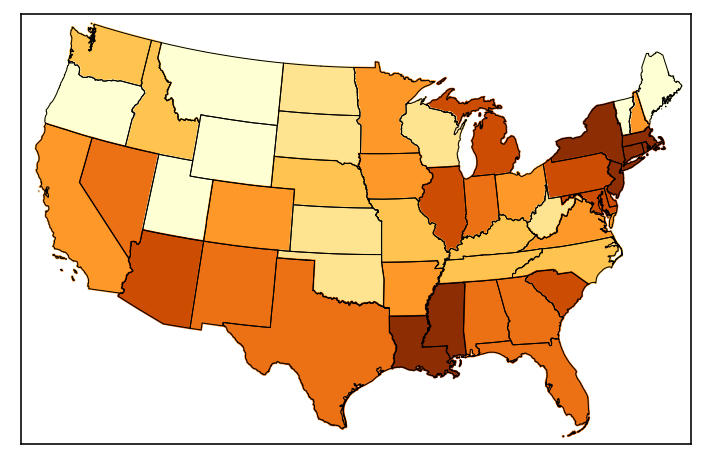

In [40]:
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
shape = m.readshapefile('st99_d00', name='states', drawbounds=True)
ax = plt.gca() # get current axes instance
   
# list of states in the data
states = [shapedict['NAME'] for shapedict in m.states_info]
    
for i, seg in enumerate(m.states):
    state = states[i]
    color = state2color[state]
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)


In [41]:
states = [shapedict['NAME'] for shapedict in m.states_info] # list comprenhension
#states

## How to make a column bar

In [42]:
colors = ["#ffffd4", "#fee391", "#fec44f", "#fe9929", "#ec7014", "#cc4c02", "#8c2d04"]
bounds = [1,2,3,4,5,6,7,8]
boundaries = [0.055, 0.139, 0.23, 0.316, 0.387, 0.588, 0.832, 1.804]

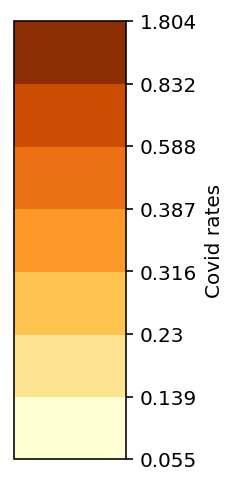

In [43]:
fig, ax = plt.subplots(figsize=(1, 8))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(colors)

cb2 = ColorbarBase(ax, cmap=cmap,
                                boundaries=bounds,
                                ticks=bounds,
                                label=boundaries,
                                orientation='vertical')
cb2.set_label('Covid rates')
cb2.set_ticklabels(boundaries)

## Put it together

In [44]:
# rounding
boundaries = [0.00, 0.14, 0.23, 0.32, 0.39, 0.59, 0.83, 1.80]

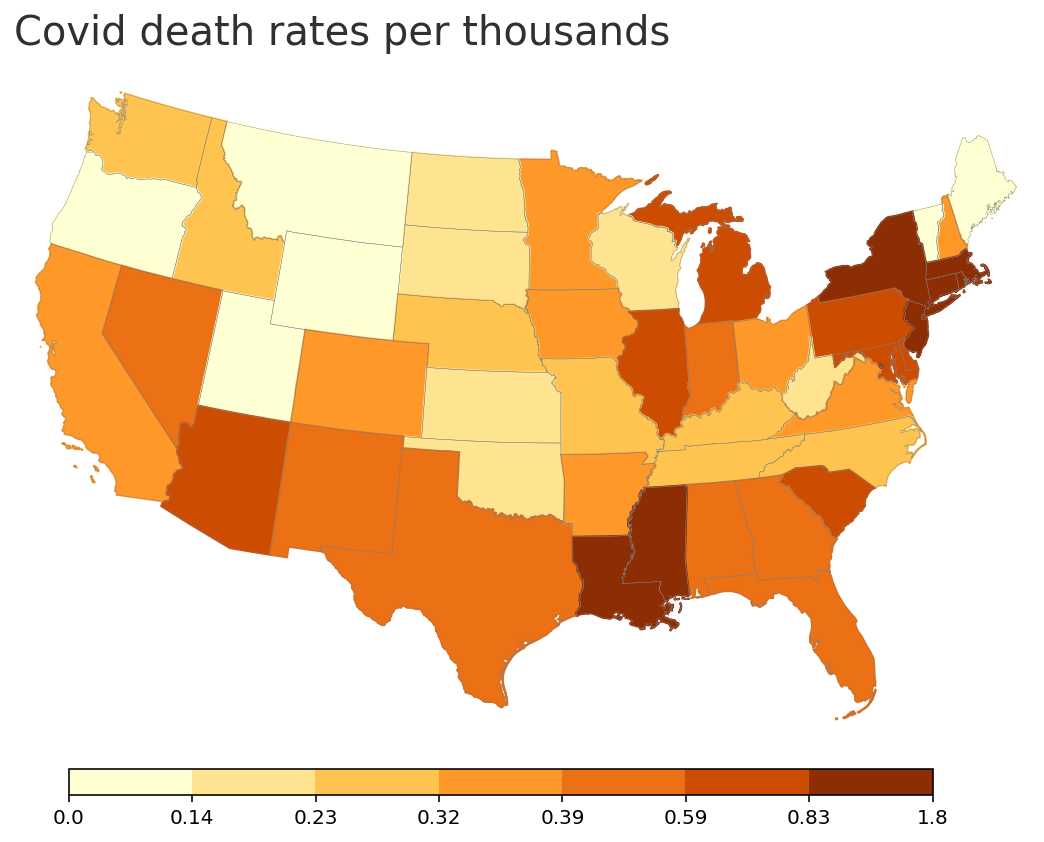

In [45]:
# Lambert Conformal map of lower 48 states.
fig, ax = plt.subplots(figsize=(12,6))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
shape = m.readshapefile('st99_d00', name='states', drawbounds=True,
                       linewidth=0.2,color='#808080')
   
# list of states in the data
states = [shapedict['NAME'] for shapedict in m.states_info]
    
for i, seg in enumerate(m.states):
    state = states[i]
    color = state2color[state]
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.annotate("Covid death rates per thousands", xy=(0, 1.05), xycoords='axes fraction', fontsize=20, color='#303030')


# [left, bottom, width, height] 
ax_c = fig.add_axes([0.25, 0.05, 0.5, 0.03])

cmap = mpl.colors.ListedColormap(colors)
cb2 = ColorbarBase(ax_c, cmap=cmap,
                  boundaries=bounds,
                  ticks=bounds,
                  label=boundaries,
                  orientation='horizontal')
cb2.set_label("")
cb2.set_ticklabels(boundaries)

## More on dataframe manipulation

`.iloc` for slicing a dataframe

In [46]:
rates.head()

,state,fips,deaths,POPESTIMATE2019,rates,color
1,Alaska,2,41,731545.0,0.056046,#ffffd4
12,Hawaii,15,96,1415872.0,0.067803,#ffffd4
54,Wyoming,56,42,578759.0,0.072569,#ffffd4
48,Vermont,50,58,623989.0,0.092950,#ffffd4
20,Maine,23,135,1344212.0,0.100431,#ffffd4


In [47]:
rates = rates.reset_index(drop=True)
rates.head()

,state,fips,deaths,POPESTIMATE2019,rates,color
0,Alaska,2,41,731545.0,0.056046,#ffffd4
1,Hawaii,15,96,1415872.0,0.067803,#ffffd4
2,Wyoming,56,42,578759.0,0.072569,#ffffd4
3,Vermont,50,58,623989.0,0.092950,#ffffd4
4,Maine,23,135,1344212.0,0.100431,#ffffd4


In [48]:
## keep the first 7 rows
rates_top7 = rates.iloc[:7]
rates_top7

,state,fips,deaths,POPESTIMATE2019,rates,color
0,Alaska,2,41,731545.0,0.056046,#ffffd4
1,Hawaii,15,96,1415872.0,0.067803,#ffffd4
2,Wyoming,56,42,578759.0,0.072569,#ffffd4
3,Vermont,50,58,623989.0,0.092950,#ffffd4
4,Maine,23,135,1344212.0,0.100431,#ffffd4
5,Oregon,41,505,4217737.0,0.119732,#ffffd4
6,Montana,30,134,1068778.0,0.125377,#ffffd4


In [49]:
## keep columns 2 and 3
rates_top7_cols23 = rates_top7.iloc[:, 2:4]
rates_top7_cols23

,deaths,POPESTIMATE2019
0,41,731545.0
1,96,1415872.0
2,42,578759.0
3,58,623989.0
4,135,1344212.0
5,505,4217737.0
6,134,1068778.0


In [50]:
# we can do it at the same time
rates.iloc[:7, 2:4]

,deaths,POPESTIMATE2019
0,41,731545.0
1,96,1415872.0
2,42,578759.0
3,58,623989.0
4,135,1344212.0
5,505,4217737.0
6,134,1068778.0


**Exercise 2**: Make a map of `rate of covid cases` per state. Can you use a diverging palette to understand states that are abobe or below average? Which plot makes more sense for this problem, one with a diverging palette or a sequential one?

**Exercise 3**: (hard) Can you annotate this plot showing the top states with death rates.